### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
import plotly.express as px

### Modelos ####
from sklearn.decomposition import PCA
import warnings

### Read 

In [24]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

X_train = pd.read_csv("X_train.csv", sep = ";")
X_test = pd.read_csv("X_test.csv", sep = ";")

y_train = pd.read_csv("y_train.csv", sep = ";")
y_test = pd.read_csv("y_test.csv", sep = ";")

X_train.head()

,RFV,H1RFV,H2RFV,CONICITY,H1LFV,PLY,LFV,RRO,CAPSPLICE,H1RRO
0,63,34,27,10.3,8.3,48.7,11.5,1.19,0.46,0.52
1,55,38,7,9.7,9.9,49.8,15.1,0.80,0.26,0.40
2,66,34,29,11.4,5.8,49.4,11.1,0.87,0.25,0.23
3,101,77,46,10.9,13.3,52.2,17.3,1.48,0.27,1.07
4,83,46,19,8.5,10.3,49.3,14.9,1.05,0.39,0.39


In [25]:
X_train.columns

Index(['RFV', 'H1RFV', 'H2RFV', 'CONICITY', 'H1LFV', 'PLY', 'LFV', 'RRO',
       'CAPSPLICE', 'H1RRO'],
      dtype='object')

In [26]:
y_train.GR.unique()

array(['B', 'A', 'C'], dtype=object)

In [27]:
y_train.GR.value_counts()

B    35
A    34
C    11
Name: GR, dtype: int64

In [28]:
# X_train = X_train[['RFV', 'H2RFV', 'CONICITY', 'RRO']]

In [41]:
scaler = MinMaxScaler()#StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train))

In [48]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif


In [53]:
selector = SelectKBest(mutual_info_classif, k=7)
X_reduced = selector.fit_transform(X_train, y_train)
X_reduced.shape


(80, 7)

In [54]:
cols = selector.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()
selected_columns


['RFV', 'H1RFV', 'H2RFV', 'CONICITY', 'PLY', 'RRO', 'H1RRO']

In [57]:
from sklearn.feature_selection import mutual_info_classif
threshold = 10  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X_train, y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
df_wine_norm_mic = X_train[high_score_features]
print(df_wine_norm_mic.columns)

CONICITY 0.3797466373576961
RRO 0.3116614375705917
RFV 0.1900482713608722
H1RRO 0.18803112620715523
H1RFV 0.17162111623599352
H2RFV 0.11876002648015471
PLY 0.04575753734473964
LFV 0.021855136018575028
CAPSPLICE 0.008523696087808563
H1LFV 0.0
Index(['CONICITY', 'RRO', 'RFV', 'H1RRO', 'H1RFV', 'H2RFV', 'PLY', 'LFV',
       'CAPSPLICE', 'H1LFV'],
      dtype='object')


## PCA

In [30]:
pca = PCA(n_components=4, copy=True, whiten=False, svd_solver='auto', tol=0.0, 
          iterated_power='auto', random_state=42)

pca.fit(X_scaled)

PCA(n_components=4, random_state=42)

In [31]:
pca.explained_variance_ratio_

array([0.40403561, 0.19689903, 0.1152365 , 0.09750371])

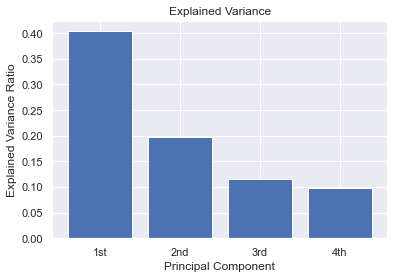

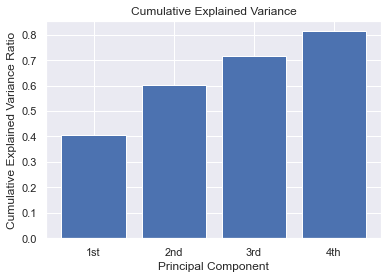

   Component  Explained Variance  Cumulative Explained Variance
0          1            0.404036                       0.404036
1          2            0.196899                       0.600935
2          3            0.115237                       0.716171
3          4            0.097504                       0.813675


In [32]:
range_x = np.arange(4)

plt.bar(range_x,pca.explained_variance_ratio_)
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance')
plt.show()

plt.bar(range_x,np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()

d = {'Component': np.r_[1:len(pca.explained_variance_ratio_)+1], 
     'Explained Variance': pca.explained_variance_ratio_, 
     'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)

print(df)

Text(0, 0.5, 'Cumulative Explained Variance')

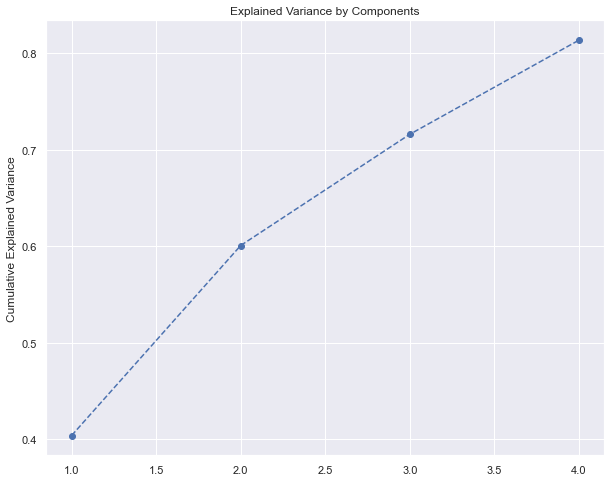

In [33]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.ylabel("Cumulative Explained Variance")

In [34]:
pca = PCA(n_components=2, random_state=42)

In [42]:
pca.fit(X_scaled)
# pca.fit(X_train)

PCA(n_components=2, random_state=42)

In [43]:
pca.explained_variance_ratio_

array([0.40403561, 0.19689903])

In [44]:
score_pca = pca.fit_transform(X_scaled)
# score_pca = pca.fit_transform(X_train)

In [45]:
column_names = ["PC_1", "PC_2"]
score_pca = pd.DataFrame(score_pca, columns=column_names)
score_pca

,PC_1,PC_2
0,0.369611,-0.111125
1,-0.027457,0.175918
2,0.040854,-0.227293
3,1.291890,0.267709
4,0.357403,0.134046
...,...,...
75,-0.010215,0.311846
76,1.209763,-0.155970
77,-0.286692,-0.123536
78,-0.588015,0.329199


In [46]:
d = pd.concat([score_pca,X_train, y_train.GR], axis=1)
d.head()

,PC_1,PC_2,RFV,H1RFV,H2RFV,CONICITY,H1LFV,PLY,LFV,RRO,CAPSPLICE,H1RRO,GR
0,0.369611,-0.111125,63,34,27,10.3,8.3,48.7,11.5,1.19,0.46,0.52,B
1,-0.027457,0.175918,55,38,7,9.7,9.9,49.8,15.1,0.80,0.26,0.40,A
2,0.040854,-0.227293,66,34,29,11.4,5.8,49.4,11.1,0.87,0.25,0.23,B
3,1.291890,0.267709,101,77,46,10.9,13.3,52.2,17.3,1.48,0.27,1.07,C
4,0.357403,0.134046,83,46,19,8.5,10.3,49.3,14.9,1.05,0.39,0.39,B


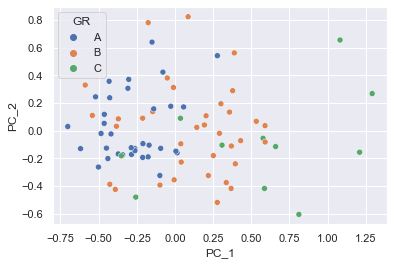

In [47]:
sns.set(color_codes=True)
sns.scatterplot(x=d['PC_1'], 
                y=d['PC_2'], 
                data=d, 
                hue=y_train.GR, hue_order = ["A", "B", "C"],  sizes=(100))
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

df = sns.load_dataset('penguins')
x=df['bill_length_mm']
y=df['bill_depth_mm']
z=df['body_mass_g']

ax.scatter(x, y, z)
plt.show()

In [18]:
def Scatterplot(data, var1, var2, cat):
    
    fig = px.scatter(data, x = var1, y = var2, color =cat, width = 800)
    fig.update_traces(marker=dict(size = 12,line = dict(width = 1)),selector=dict(mode = 'markers'))
    fig.update_layout(title = 'Scatterplot: ' + var1 + " vs " + var2)
    fig.update_xaxes(title = var1)
    fig.update_yaxes(title = var2)
    fig.show()

In [21]:
Scatterplot(d, "PC_1", "PC_2",  "GR")